<h2><b>Fermi-Hubbard Dynamics</b></h2>
<font size="3">

<hr>
DISTRIBUTION STATEMENT A. Approved for public release. Distribution is unlimited.

This material is based upon work supported by the Under Secretary of Defense for
Research and Engineering under Air Force Contract No. FA8702-15-D-0001. Any opinions,
findings, conclusions or recommendations expressed in this material are those of the
author(s) and do not necessarily reflect the views of the Under Secretary of Defense
for Research and Engineering.

© 2025 Massachusetts Institute of Technology.

The software/firmware is provided to you on an As-Is basis

Delivered to the U.S. Government with Unlimited Rights, as defined in DFARS Part
252.227-7013 or 7014 (Feb 2014). Notwithstanding any copyright notice, U.S. Government
rights in this work are defined by DFARS 252.227-7013 or DFARS 252.227-7014 as detailed
above. Use of this work other than as specifically authorized by the U.S. Government
may violate any copyrights that exist in this work.
<hr><hr>
</font>

<div class=\"alert alert-block alert-info\"> <b>REFERENCE:</b> A comprehensive description of this application is provided in <a href=\"https://arxiv.org/abs/2406.06511"><b>arXiv:2406.06511</b></a>. </div>

# 1. Application Overview


The Fermi-Hubbard (FH) model is essentially a minimal treatment of electronic structure for periodic systems. While reductionistic, this model is believed to capture much of the physics underlying strong correlation. In this case, the electronic properties of a material are described by specifying one or more orbitals on each lattice site. Adjacent sites are coupled using tight-binding terms, while the Coulomb interaction is reduced to an on-site contact interaction between different spin channels.  The resulting Hamiltonian assumes a straightforward form:

\begin{equation}
H = \underbrace{-J\sum_{\langle p,q \rangle,\sigma} \left[c^\dagger_{p,\sigma} c_{q,\sigma} + c^\dagger_{q,\sigma} c_{p,\sigma}\right]}_{\text{Hopping}} + \underbrace{U \sum_{\langle p \rangle} n_{p,\uparrow} n_{p,\downarrow}}_{\text{Density Interaction}}.
\end{equation}

We have written this example for a single band, e.g., with one orbital per lattice site.  The first term in this Hamiltonian corresponds to a standard tight-binding model.  In the absence of interactions ($U = 0$) this  describes the propagation of fermions between sites at a rate determined by $J$.  The second term delivers a notorious degree of complexity - here, the parameter $U$ specifies the strength of many-body interactions.  These interations modulate the effective hopping rate while tuning on-site carrier and spin densities. Our notation labels the lattice sites using composite indices $p,q$ and introduces $\sigma \in \{\uparrow,\downarrow\}$ to denote the spin eigenstate (we can add an orbital index to $p,q$ in more complex arrangements).  Angle brackets denote summation over nearest-neighbor pairs, while the operators $c^\dagger_{p,\sigma}, c_{p,\sigma}$ describe the creation or annihilation of a spin-$\sigma$ fermion on the  $p$-th site.  The  $n_{k,\sigma} = c^\dagger_{k,\sigma} c_{k,\sigma}$ are the corresponding number operators.

While approximate, the Fermi-Hubbard Hamiltonian is believed to capture many important aspects of electronic correlation (such as the competition between electronic and magnetic orders).  Analytical and numerical results both suggest an intricate phase diagram for this model.  However, many theoretical efforts have been limited by inherent mathematical complexities or the exponential overhead required for precise numerical treatments.  It is nonetheless clear that the interaction strength  $U/J$ and doping fraction have a strong effect on the degree of many-body correlations and the nature of emergent phases. Indeed, prior efforts have suggested that these might span from Mott insulating and antiferromagnetic regimes to (non)-Fermi liquid behavior and unconventional superconducting states.  Verifying these assertions will likely require methods beyond classical computation.  

<hr>

# 2. Baseline Logical Resource Estimates

For the baseline resource estimates, we use $J=1$ and $U=2$ with lattice size ranging from $N= 2$ to $100$. We estimate the logical resources for time evolution of the Hamiltonian:
\begin{equation}
H = \underbrace{-J\sum_{\langle p,q \rangle,\sigma} \left[c^\dagger_{p,\sigma} c_{q,\sigma} + c^\dagger_{q,\sigma} c_{p,\sigma}\right]}_{\text{Hopping}} + \underbrace{U \sum_{\langle p \rangle} n_{p,\uparrow} n_{p,\downarrow}}_{\text{Density Interaction}}.
\end{equation}
using qubitized methods with the block encoding given in Section V of [arxiv:1805.03662](https://arxiv.org/abs/1805.03662). We do this for a qsp precision of $4.81\times 10^{-9}$ and simulation time of $1000\cdot 2\pi\alpha$, where $\alpha$ is the Hamiltonian norm. A comprehensive overview of the simulation method is provided in [Examples/ApplicationInstances/FermiHubbard/fermi_hubbard-dynamics-qubitized.ipynb](../FermiHubbard/fermi_hubbard-dynamics-qubitized.ipynb).

The input parameters are chosen to reflect a high value instance of the model as described in [arxiv:2406.06511](https://arxiv.org/abs/2406.06511). Note that classical methods currently start to falter around $N=20$, so that marks where quantum computing methods may begin to prove useful. We include estimates for $N<20$ for illustrative purposes.

In [1]:
from    pyLIQTR.ProblemInstances.getInstance                  import   getInstance
from    pyLIQTR.clam.lattice_definitions                      import   SquareLattice
from    pyLIQTR.BlockEncodings.getEncoding                    import   getEncoding, VALID_ENCODINGS
from    pyLIQTR.qubitization.qsvt_dynamics                    import   qsvt_dynamics
from    pyLIQTR.utils.resource_analysis                       import   estimate_resources
import  numpy as np

The resource estimates for the full range take around 1 hour to run. The precomputed counts are provided below.

In [ ]:
Ns = [2, 5, 10, 20, 40, 75, 100]
all_re = {}

for N in Ns:
    print(f"Generating resource estimate for N = {N}...")
    J      =  -1.0     
    U      =  2.0         
    shape  =  (N,N)

    # generate the Hamiltonian model for the given lattic size
    model   =   getInstance('FermiHubbard',shape=shape, J=J, U=U, cell=SquareLattice)

    # generate the block encoding
    block_encoding   =   getEncoding(VALID_ENCODINGS.FermiHubbardSquare)(model)

    # set dynamics parameters
    eps = 4.81e-9
    time = 2000*np.pi*block_encoding.alpha
    
    # generate the full qsvt circuit
    gate_qsvt   =  qsvt_dynamics(encoding=getEncoding(VALID_ENCODINGS.FermiHubbardSquare),
                               instance=model,
                               eps=eps,
                               times=time,
                               phase_algorithm="random",
                               time_rescale=False)
    
    # estimate the logical resources
    resource_estimate  =  estimate_resources(gate_qsvt)

    all_re[N] = resource_estimate

In [2]:
# precomputed
all_re = {
 2: {'LogicalQubits': 21, 'T': 600043194, 'Clifford': 1377017067},
 5: {'LogicalQubits': 73, 'T': 8067350158, 'Clifford': 21465432583},
 10: {'LogicalQubits': 228, 'T': 49496090538, 'Clifford': 163034147799},
 20: {'LogicalQubits': 833, 'T': 456895559810, 'Clifford': 1844344787443},
 40: {'LogicalQubits': 3238, 'T': 5903284173946, 'Clifford': 26282475703839},
 75: {'LogicalQubits': 11293, 'T': 68743872855142, 'Clifford': 315352430206439},
 100: {'LogicalQubits': 20043, 'T': 214472818210254, 'Clifford': 989674554689751}
 }

## Plot

Here, we plot the computation size versus the system size. The computation size is calculated as the number of T gates multiplied by the number of logical qubits and the system size is the number of logical qubits. 

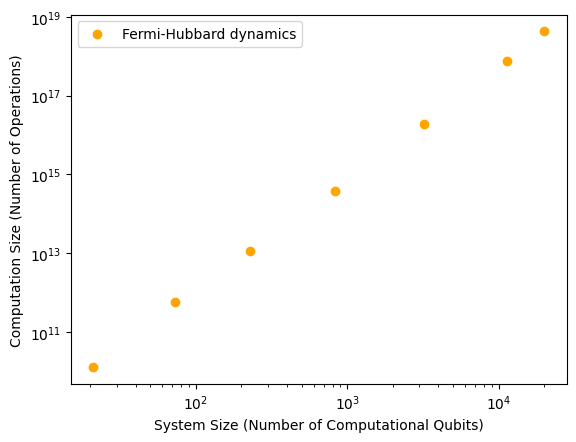

In [3]:
import matplotlib.pyplot as plt

system_size = []
computation_size = []
for N in all_re:
    system_size += [all_re[N]['LogicalQubits']]
    computation_size += [all_re[N]['LogicalQubits']*all_re[N]['T']]

plot_color = 'orange'
fig, ax = plt.subplots()
ax.scatter(system_size, computation_size, facecolors=plot_color,label = 'Fermi-Hubbard dynamics')
ax.set_xlabel('System Size (Number of Computational Qubits)')
ax.set_ylabel('Computation Size (Number of Operations)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend();

## save output

We can save the estimates to a json file formatted for easy input to the QB Plot Tool.

In [4]:
from pyLIQTR.utils.resource_analysis import write_resource_estimation_json

write_resource_estimation_json(estimates=all_re,application_id='fermi_hubbard_dynamics',category='scientific',plot_legend_name='Fermi-Hubbard dynamics',plot_color=plot_color,reference='')

<hr>

With the application circuit in hand, we can do further analysis using the pyLIQTR scheduling, qasm printing, and circuit decomposition capabilities. Please see the [Best Practices](https://isi-usc-edu.github.io/pyLIQTR/_build/html/best_practice.html) for guidance on how to use these tools and refer to the notebooks in [Examples/ApplicationInstances/](../) for detailed demonstrations.